In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
results_dir = "coloring"

In [3]:
raw_result_filename = "graph_7__0__100000__False__1__raw"

In [4]:
df = pd.read_csv(f"results/{results_dir}/{raw_result_filename}.csv")

In [5]:
df.set_index("Iteration", inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9
Iteration,,,,,,,,,,
1,3,1,2,3,1,3,3,3,3,3
2,5,1,3,3,8,4,5,3,5,1
3,5,1,3,3,3,2,2,3,1,6
4,3,12,4,11,13,4,11,3,9,9
5,2,2,3,4,3,1,3,3,3,1


In [6]:
value_counts = {}
for c in df.columns:
    value_counts[c] = df[c].value_counts()

In [7]:
agg_df = pd.DataFrame(value_counts).fillna(0).astype(int)
agg_df.rename_axis('Steps', inplace=True)
agg_df = agg_df.add_prefix("Node_")
agg_df

,Node_0,Node_1,Node_2,Node_3,Node_4,Node_5,Node_6,Node_7,Node_8,Node_9
Steps,,,,,,,,,,
1,39975,39914,39720,39887,39976,40014,39915,39869,39993,39752
2,16407,3262,3354,3356,4982,17434,1714,1749,1663,1753
3,14950,23163,23314,23186,20150,18101,26255,26294,26254,26122
4,5431,3856,3853,3821,4337,5330,2696,2705,2686,2713
5,8943,14328,14288,14288,12450,9317,14626,14797,14821,14818
6,2649,2301,2174,2239,2966,2203,1955,1966,2095,1955
7,5109,6709,6771,6695,6352,4065,6172,6186,6105,6233
8,1392,1291,1359,1310,1697,903,1349,1280,1360,1403
9,2461,2660,2699,2686,3187,1474,2520,2414,2438,2534


In [8]:
# save agg_df
agg_df.to_csv(f"agg_{raw_result_filename}.csv")


In [9]:
# filter columns
agg_df = agg_df[['Node_0', 'Node_4', 'Node_5', 'Node_9']]
agg_df

,Node_0,Node_4,Node_5,Node_9
Steps,,,,
1,39975,39976,40014,39752
2,16407,4982,17434,1753
3,14950,20150,18101,26122
4,5431,4337,5330,2713
5,8943,12450,9317,14818
6,2649,2966,2203,1955
7,5109,6352,4065,6233
8,1392,1697,903,1403
9,2461,3187,1474,2534


In [10]:
plt.ioff()
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

In [11]:
plt.ioff()
ax = sns.lineplot(agg_df, linewidth=2, markersize=10)

In [12]:
markers = ('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

In [13]:
for i, line in enumerate(ax.lines):
    line.set_marker(markers[i % (len(agg_df.columns)-1)])

In [14]:
def filename_parser(filename):
    graph_name, central_dist, no_sim, me, fault_interval, _ = filename.split("__")
    return f"Program: {results_dir} | Graph: {graph_name} | {'Distributed' if central_dist=='1' else 'Central'} | N: {no_sim} | ME: {me} | Fault Interval: {fault_interval}"

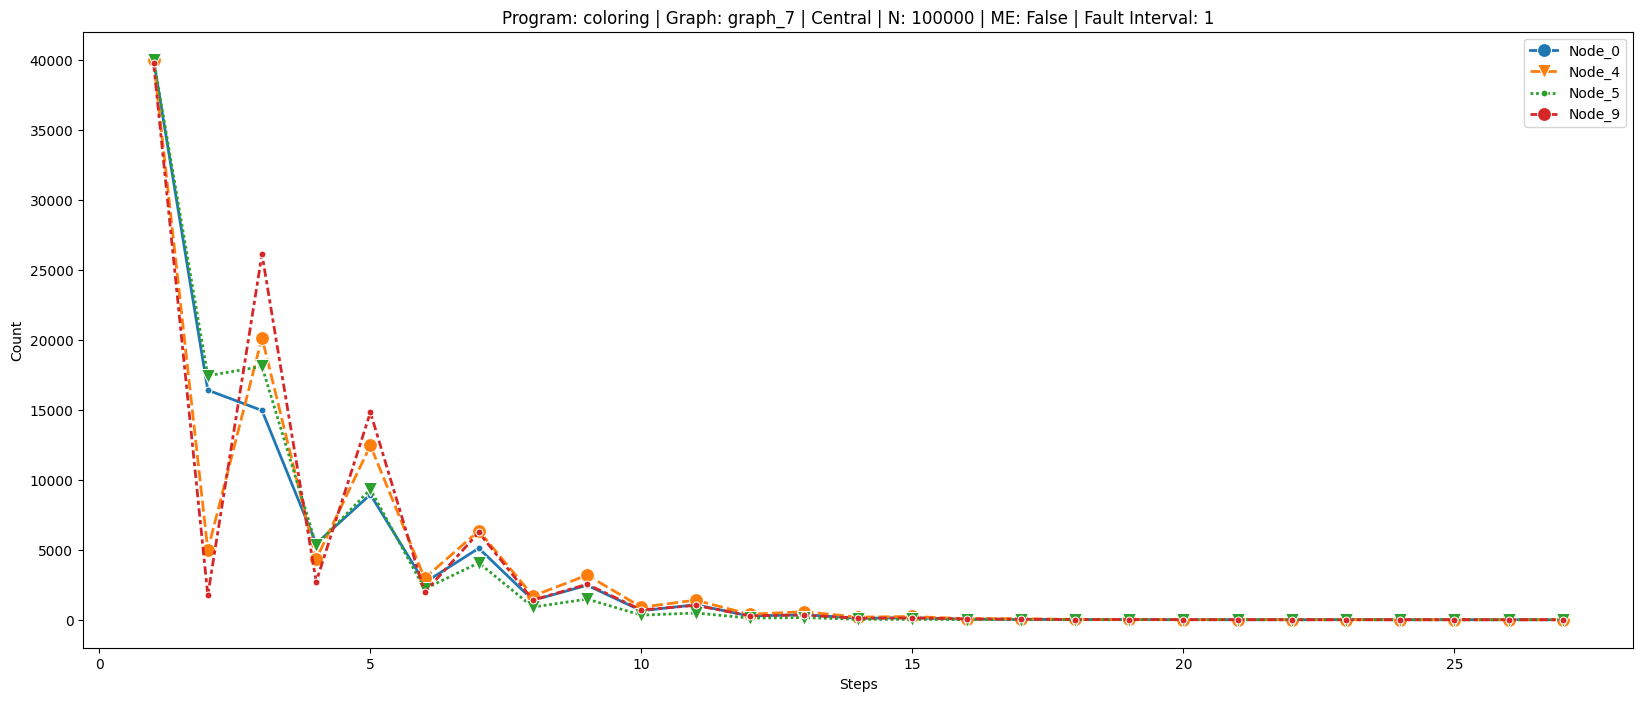

In [15]:
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Count")
plt.title(filename_parser(raw_result_filename))
plt.show()